In [ ]:

from tensorflow.keras.optimizers import Adam
optimizer = Adam(0.0002, 0.5)

In [ ]:
from keras.optimizers import adam

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np


In [ ]:
np.random.seed(10)
epochs = 5
noise_dim = 100
batch_size = 16
steps_per_epoch = 3750
img_rows, img_cols, channels = 28, 28, 1

In [ ]:
from keras.datasets import mnist
(X_train, _), (_, _) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train = (X_train.astype(np.float32) - 127.5) / 127.5
X_train = X_train.reshape(-1, img_rows*img_cols*channels)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers.advanced_activations import LeakyReLU

In [ ]:
def create_generator():
    generator = Sequential()
    generator.add(Dense(input_dim = noise_dim, units = 256))
    generator.add(LeakyReLU(0.2))
    
    generator.add(Dense(units = 512))
    generator.add(LeakyReLU(0.2))
    
    generator.add(Dense(units = 1024))
    generator.add(LeakyReLU(0.2))
    
    generator.add(Dense(units = img_rows*img_cols*channels, activation = 'tanh'))
    
    generator.compile(loss = 'binary_crossentropy', optimizer = optimizer)
    
    
    return generator

In [ ]:
generator = create_generator()
generator.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              525312    
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 784)              

In [ ]:
def create_descriminator():
    descreminator = Sequential()
    
    descreminator.add(Dense(units = 1024, input_dim = img_cols*img_rows*channels))
    descreminator.add(LeakyReLU(0.2))
    
    descreminator.add(Dense(units = 512))
    descreminator.add(LeakyReLU(0.2))
    
    descreminator.add(Dense(units = 256))
    descreminator.add(LeakyReLU(0.2))
    
    descreminator.add(Dense(units = 1, activation = 'sigmoid'))
    
    descreminator.compile(loss = 'binary_crossentropy', optimizer = 'adam')
    return descreminator

In [ ]:
descreminator = create_descriminator()
descreminator.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 1024)              803840    
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 512)               524800    
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                

In [ ]:
from keras.layers import Input
from keras.models import Model

descreminator.trainable = False

gan_input = Input(shape = (noise_dim,))
fake_img = generator(gan_input)
gan_output = descreminator(fake_img)
gan = Model(gan_input, gan_output)
gan.compile(loss='binary_crossentropy', optimizer=optimizer)

In [ ]:
gan.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 784)               1486352   
_________________________________________________________________
sequential_2 (Sequential)    (None, 1)                 1460225   
Total params: 2,946,577
Trainable params: 1,486,352
Non-trainable params: 1,460,225
_________________________________________________________________


In [ ]:
for epoch in range(epochs):
    for batch in range(steps_per_epoch):
        noise = np.random.normal(0, 1, size=(batch_size, noise_dim))
        fake_x = generator.predict(noise)

        

        real_x = x_train[np.random.randint(0, x_train.shape[0], size=batch_size)]
        real_x = real_x.reshape(-1, 28*28)
        
        x = np.concatenate((real_x, fake_x))

        disc_y = np.zeros(2*batch_size)
        disc_y[:batch_size] = 0.9

        d_loss = descreminator.train_on_batch(x, disc_y)

        y_gen = np.ones(batch_size)
        g_loss = gan.train_on_batch(noise, y_gen)

    print(f'Epoch: {epoch} \t Discriminator Loss: {d_loss} \t\t Generator Loss: {g_loss}')

Epoch: 0 	 Discriminator Loss: 4.913545608520508 		 Generator Loss: 18.11962890625
Epoch: 1 	 Discriminator Loss: 1.0383548736572266 		 Generator Loss: 3.309666156768799
Epoch: 2 	 Discriminator Loss: 0.5729127526283264 		 Generator Loss: 1.0892515182495117
Epoch: 3 	 Discriminator Loss: 0.6288470029830933 		 Generator Loss: 1.0724365711212158
Epoch: 4 	 Discriminator Loss: 0.5616300106048584 		 Generator Loss: 1.4693946838378906


In [ ]:
import matplotlib.pyplot as plt

def show_images(noise):
    generated_images = generator.predict(noise)
    plt.figure(figsize=(10, 10))
    
    for i, image in enumerate(generated_images):
        plt.subplot(10, 10, i+1)
        if channels == 1:
            plt.imshow(image.reshape((img_rows, img_cols)), cmap='gray')
        else:
            plt.imshow(image.reshape((img_rows, img_cols, channels)))
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

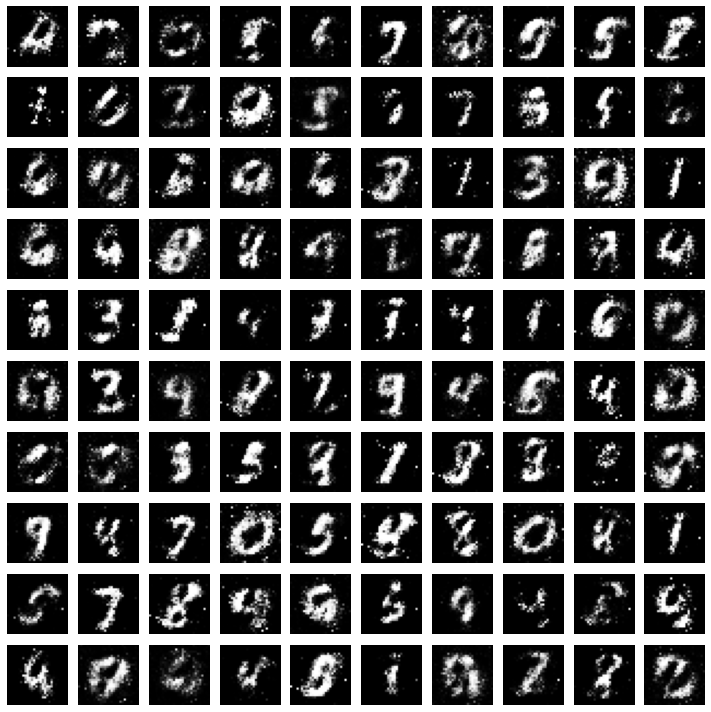

In [ ]:
noise = np.random.normal(0, 1, size=(100, noise_dim))
show_images(noise)